# Set up

In [1]:
import numpy as np
import os

from helper import *
from tsp import *
from tsp_integer_solver import *
#from tsp_fractional_solver import *

# Question 1

In [2]:
problem = 'rbg443.atsp' #'rbg323.atsp'
tsp_loader = TspDataLoader()
n_vertices, cost = tsp_loader.load_problem(problem)
print('Optimal solution:', get_opt_sol(problem))

EXPLICIT
Optimal solution: 2720


In [3]:
i = TspInstance(n_vertices=n_vertices, cost=cost)
s = TspIntegerBCSolver(instance=i, cardinality=None, time_limit=10)
solution = s.solve()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-12
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 886 rows, 195806 columns and 391612 nonzeros
Model fingerprint: 0xf767418b
Variable types: 0 continuous, 195806 integer (195806 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.29s
Presolved: 886 rows, 195806 columns, 391612 nonzeros
Variable types: 0 continuous, 195806 integer (195806 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   8.860000e+02   0.000000e+00      9s

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      D

In [4]:
solution_info = get_solution_info(solution)
print(solution_info['exec_time'])
print(solution_info['lazy_constraints_count'])
print(solution_info['cost'])

30.780302047729492
{'more than 3': 38, 2: 221, 3: 4}
2720.0


In [5]:
# Output time and objective value for different number of vertices
time_list_int = list()
objective_list_int = list()
time_list_frac = list()
objective_list_frac = list()
vertices_list = range(23, 324, 50)

for vert in vertices_list:
    filtered_vertices = vert
    filtered_cost = {(i, j): cost_val for (i, j), cost_val in cost.items() if i < filtered_vertices and j < filtered_vertices}

    i_int = TspInstance(n_vertices=filtered_vertices, cost=filtered_cost)
    s_int = TspIntegerBCSolver(instance=i_int, cardinality=None)
    solution = s_int.solve()

    time_list_int.append(s_int._model.Runtime)
    objective_list_int.append(s_int._model.ObjVal)
    
    i_frac = TspInstance(n_vertices=filtered_vertices, cost=filtered_cost)
    s_frac = TspFractionalBCSolver(instance=i_frac, cardinality=None)
    solution = s_frac.solve()

    time_list_frac.append(s_frac._model.Runtime)
    objective_list_frac.append(s_frac._model.ObjVal)

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 46 rows, 506 columns and 1012 nonzeros
Model fingerprint: 0x939826f1
Variable types: 0 continuous, 506 integer (506 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 46 rows, 506 columns, 1012 nonzeros
Variable types: 0 continuous, 506 integer (506 binary)

Root relaxation: objective 2.590000e+02, 82 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  259.00000    0    -          -  259.00000      -     -    0s
*    0     0               0     259.0000000  259.

NameError: name 'TspFractionalBCSolver' is not defined

# Graphing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


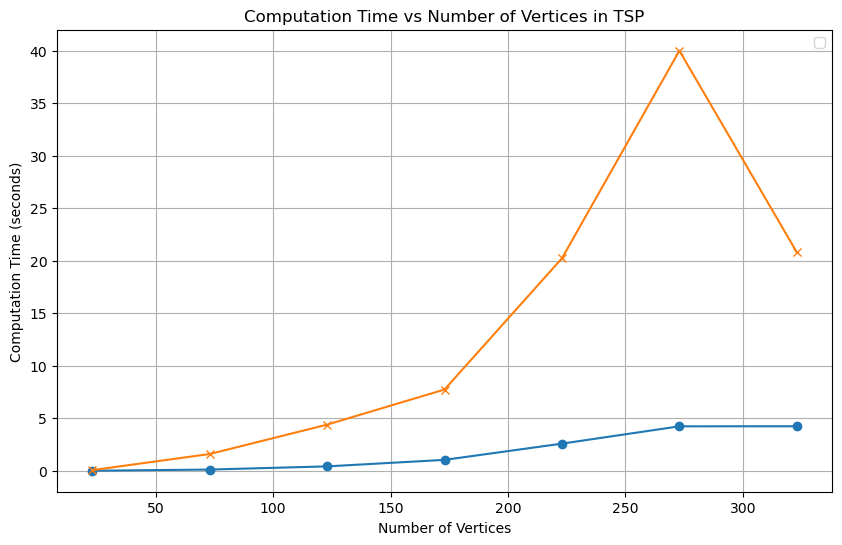

[0.014949798583984375,
 0.12566113471984863,
 0.4279000759124756,
 1.0476880073547363,
 2.5928308963775635,
 4.2399821281433105,
 4.24576997756958]

In [ ]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(vertices_list, time_list_int, marker='o')
plt.plot(vertices_list, time_list_frac, marker='x')
plt.xlabel('Number of Vertices')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Vertices in TSP')
plt.legend()
plt.grid(True)
plt.show()


## Baseline

In [ ]:
# Load data set 1
tsp_loader = TspDataLoader()
n_vertices, cost = tsp_loader.load_problem('rbg323.atsp')

# Load data set 2
##tsp_loader_2 = TspDataLoader()
#n_vertices_2, cost_2 = tsp_loader_2.load_problem('ftv64.atsp')

In [ ]:
i = TspInstance(n_vertices=n_vertices, cost=cost)
s = TspIntegerBCSolver(instance=i, cardinality=None)
solution = s.solve()

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 646 rows, 104006 columns and 208012 nonzeros
Model fingerprint: 0x6de01d01
Variable types: 0 continuous, 104006 integer (104006 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.09s
Presolved: 646 rows, 104006 columns, 208012 nonzeros
Variable types: 0 continuous, 104006 integer (104006 binary)

Root relaxation: objective 1.326000e+03, 1691 iterations, 0.09 seconds (0.20 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1326.00000    0    -          - 1326.00000      -     -    2s
     0     0 1326.00000    0 

In [ ]:
# Check how many times cardinality constraints where violated
for entry in s.lazy_constraints_added:
    subtour = entry['subtour']
    constraint = entry['constraint']
    
    # Check if the subtour length is exactly 2
    if len(subtour) == 2:
        # The subtour contains exactly two vertices i and j
        i, j = subtour
        # The corresponding constraint is for i to j and j to i
        print(f"Lazy constraint for subtour {subtour}")


Lazy constraint for subtour [35, 264]
Lazy constraint for subtour [0, 322]
Lazy constraint for subtour [1, 321]
Lazy constraint for subtour [2, 320]
Lazy constraint for subtour [3, 319]
Lazy constraint for subtour [4, 318]
Lazy constraint for subtour [5, 317]
Lazy constraint for subtour [6, 316]
Lazy constraint for subtour [7, 315]
Lazy constraint for subtour [8, 314]
Lazy constraint for subtour [9, 313]
Lazy constraint for subtour [10, 312]
Lazy constraint for subtour [11, 311]
Lazy constraint for subtour [12, 310]
Lazy constraint for subtour [13, 309]
Lazy constraint for subtour [14, 308]
Lazy constraint for subtour [15, 307]
Lazy constraint for subtour [16, 306]
Lazy constraint for subtour [17, 305]
Lazy constraint for subtour [18, 304]
Lazy constraint for subtour [19, 303]
Lazy constraint for subtour [20, 302]
Lazy constraint for subtour [21, 301]
Lazy constraint for subtour [22, 300]
Lazy constraint for subtour [23, 299]
Lazy constraint for subtour [24, 298]
Lazy constraint for su

In [ ]:
# Assuming 's' has a Gurobi model, you can access the runtime
model = s.model  # Replace 's.model' with the appropriate attribute to access the Gurobi model
solve_time = model.Runtime
solve_time

AttributeError: 'TspIntegerBCSolver' object has no attribute 'model'

In [ ]:
# Check how many times cardinality constraints where violated
for entry in s.lazy_constraints_added:
    subtour = entry['subtour']
    constraint = entry['constraint']
    

    # Check if the subtour length is exactly 2
    if len(subtour) == 3:
        # The subtour contains exactly two vertices i and j
        i, j, k = subtour
        # The corresponding constraint is for i to j and j to i
        print(f"Lazy constraint for subtour {subtour}")

Lazy constraint for subtour [45, 88, 110]
Lazy constraint for subtour [162, 195, 275]
Lazy constraint for subtour [160, 161, 162]
Lazy constraint for subtour [0, 317, 316]
Lazy constraint for subtour [1, 308, 306]


## Cardinality 2

In [ ]:
i = TspInstance(n_vertices=n_vertices, cost=cost)
s = TspIntegerBCSolver(instance=i, cardinality=2)
solution = s.solve()

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 196692 rows, 195806 columns and 783224 nonzeros
Model fingerprint: 0xa157d3c3
Variable types: 0 continuous, 195806 integer (195806 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 97903 rows and 0 columns
Presolve time: 1.06s
Presolved: 98789 rows, 195806 columns, 587418 nonzeros
Variable types: 0 continuous, 195806 integer (195806 binary)
Root relaxation presolved: 98900 rows, 195806 columns, 588744 nonzeros

Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.890e+05
 Factor NZ  : 8.884e+05 (

In [ ]:
solution_info = get_solution_info(solution)
print(solution_info['exec_time'])
print(solution_info['lazy_constraints_count'])
print(solution_info['cost'])

29.49634289741516
{'more than3': 134, 3: 1}
2720.000000000001


## Cardinality 3

In [ ]:
i = TspInstance(n_vertices=n_vertices, cost=cost)
s = TspIntegerBCSolver(instance=i, cardinality=3)
solution = s.solve()

KeyboardInterrupt: 

In [ ]:
solution_info = get_solution_info(solution)
print(solution_info['exec_time'])
print(solution_info['lazy_constraints_count'])
print(solution_info['cost'])